In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_circles
import plotly.express as px
import plotly.graph_objects as go

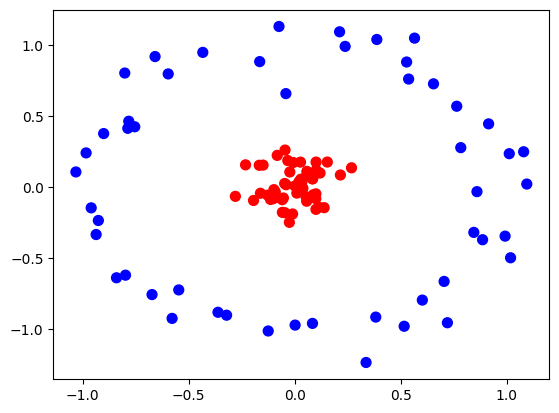

In [2]:
X,y=make_circles(n_samples=100,factor=.1,noise=0.1)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='bwr')

In [3]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [4]:
classifier=SVC(kernel='linear')
classifier.fit(x_train,y_train.ravel())
y_pred=classifier.predict(x_test)

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.45

In [8]:
zero_one_colormap=ListedColormap(('blue','red'))
def plot_decision_boundary(X,y,clf):
    X_set,y_set=X,y
    X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,
                               stop=X_set[:,0].max()+1,step=0.01),
                     np.arange(start=X_set[:,1].min()-1,
                              stop=X_set[:,1].max()+1,
                              step=0.01))
    plt.contourf(X1,X2,clf.predict(np.array([X1.ravel(),
                                            X2.ravel()]).T).reshape(X1.shape),
                alpha=0.75,cmap=zero_one_colormap)
    plt.xlim(X1.min(),X1.max())
    plt.ylim(X2.min(),X2.max())
    for i ,j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                   c=(zero_one_colormap)(i),label=j)
    plt.title("SVM Decision boundary")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    return plt.show()

C:\Users\yakle\AppData\Local\Temp\ipykernel_19424\2003093830.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],


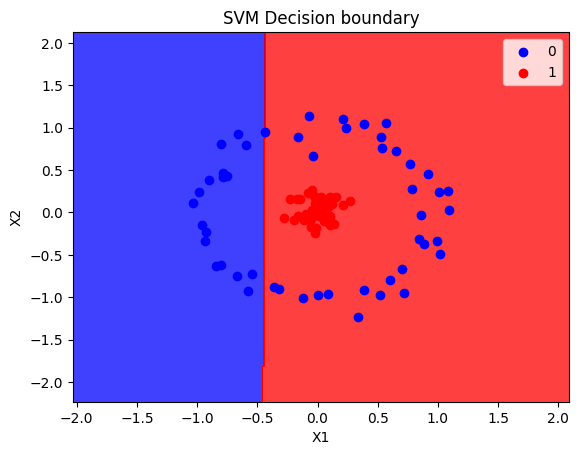

In [9]:
plot_decision_boundary(X,y,classifier)

In [10]:
def plot_3d_plot(x,y):
    r=np.exp(-(x**2).sum(1))
    ax=plt.subplot(projection='3d')
    ax.scatter3D(x[:,0],x[:,1],r,c=y,s=100,cmap='bwr')
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

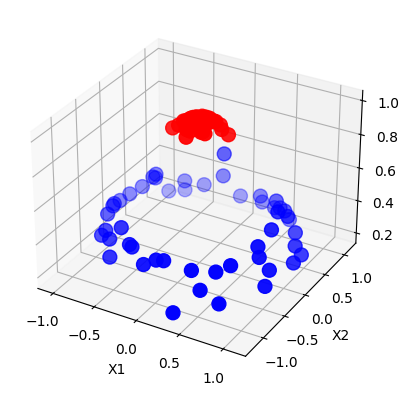

In [11]:
plot_3d_plot(X,y)

In [12]:
rbf_classifier=SVC(kernel='rbf')
rbf_classifier.fit(x_train,y_train)
y_pred=rbf_classifier.predict(x_test)

In [13]:
accuracy_score(y_test,y_pred)

1.0

C:\Users\yakle\AppData\Local\Temp\ipykernel_19424\2003093830.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],


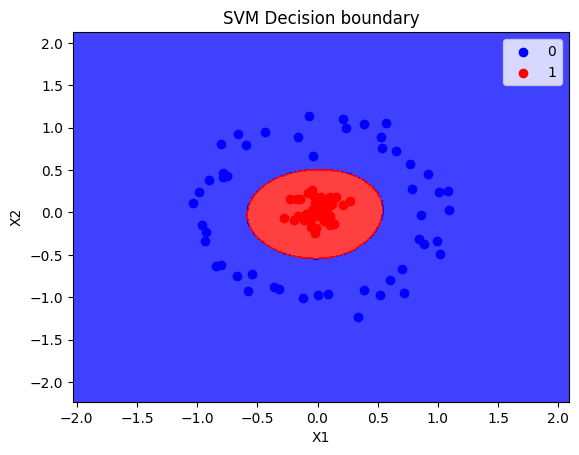

In [14]:
plot_decision_boundary(X,y,rbf_classifier)

In [15]:
poly_classifier=SVC(kernel='poly',degree=2)
poly_classifier.fit(x_train,y_train)
y_pred=poly_classifier.predict(x_test)

In [16]:
accuracy_score(y_test,y_pred)

1.0

C:\Users\yakle\AppData\Local\Temp\ipykernel_19424\2003093830.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],


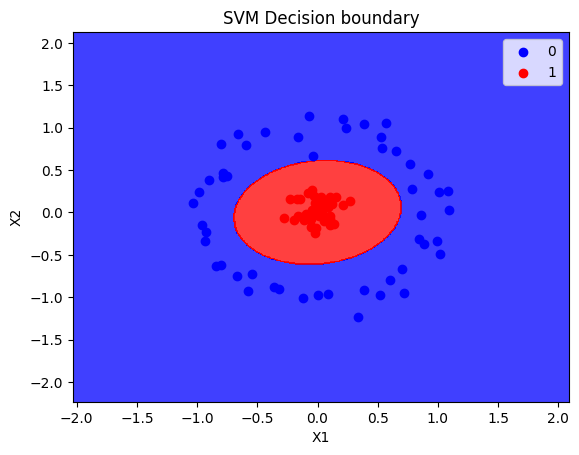

In [17]:
plot_decision_boundary(X,y,poly_classifier)

In [18]:
X_new=np.exp(-(X**2))

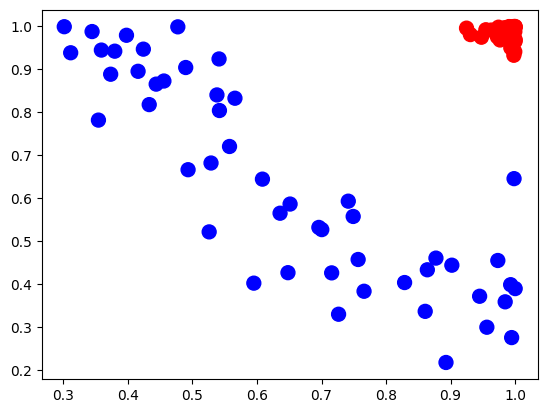

In [19]:
plt.scatter(X_new[:,0],X_new[:,1],c=y,s=100,cmap='bwr')